In [1]:
import PyComplexHeatmap as pch
import pandas as pd
from pathlib import Path
import re
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import muon as mu

2024-01-31 16:37:03.824617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-31 16:37:05.166008: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [155]:
!mkdir ../result/24.1.31_fig5_trajmap_plot

In [2]:
trajMap=mu.read_h5mu("../../important_processed_data/12.30_trajMap.h5mu")

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [60]:
trajMap.obs["Lineage"]

Bmsc2019_Regev_b3_sep_Chondro                                       Chondro
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro                               Chondro
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro                        Chondro
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro                         Chondro
BmscEndosteal_Ono_Gas1CE_sep_Chondro                                Chondro
                                                                    ...    
Metaphysis_Yang_4_sep_Fibroblast                                 Fibroblast
Metaphysis_Yang_sorted_sep_Fibroblast                            Fibroblast
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast    Fibroblast
Septoclasts_Kishor_Longbone2_sep_Fibroblast                      Fibroblast
Septoclasts_Kishor_Pdgfra_sep_Fibroblast                         Fibroblast
Name: Lineage, Length: 121, dtype: category
Categories (4, object): ['Chondro', 'Fibroblast', 'Lepr_BMSC', 'Mesenchyme']

In [3]:
travModel=pd.read_csv("../processed_data/12.12_TRAV/24.1.31_ravMatrix.csv",index_col=0)

In [14]:
RAVname = [f"TRAV{i}" for i in range(1, travModel.shape[1] + 1)]


In [16]:
RAVname

['TRAV1',
 'TRAV2',
 'TRAV3',
 'TRAV4',
 'TRAV5',
 'TRAV6',
 'TRAV7',
 'TRAV8',
 'TRAV9',
 'TRAV10',
 'TRAV11',
 'TRAV12',
 'TRAV13',
 'TRAV14',
 'TRAV15',
 'TRAV16',
 'TRAV17',
 'TRAV18',
 'TRAV19',
 'TRAV20',
 'TRAV21',
 'TRAV22',
 'TRAV23',
 'TRAV24',
 'TRAV25',
 'TRAV26',
 'TRAV27',
 'TRAV28',
 'TRAV29',
 'TRAV30',
 'TRAV31',
 'TRAV32',
 'TRAV33',
 'TRAV34',
 'TRAV35',
 'TRAV36',
 'TRAV37',
 'TRAV38',
 'TRAV39',
 'TRAV40',
 'TRAV41',
 'TRAV42',
 'TRAV43',
 'TRAV44',
 'TRAV45',
 'TRAV46',
 'TRAV47',
 'TRAV48',
 'TRAV49',
 'TRAV50',
 'TRAV51',
 'TRAV52',
 'TRAV53',
 'TRAV54',
 'TRAV55',
 'TRAV56',
 'TRAV57',
 'TRAV58',
 'TRAV59',
 'TRAV60',
 'TRAV61',
 'TRAV62',
 'TRAV63',
 'TRAV64',
 'TRAV65',
 'TRAV66',
 'TRAV67',
 'TRAV68',
 'TRAV69',
 'TRAV70',
 'TRAV71',
 'TRAV72',
 'TRAV73',
 'TRAV74',
 'TRAV75',
 'TRAV76',
 'TRAV77',
 'TRAV78',
 'TRAV79',
 'TRAV80',
 'TRAV81',
 'TRAV82',
 'TRAV83',
 'TRAV84',
 'TRAV85',
 'TRAV86',
 'TRAV87',
 'TRAV88',
 'TRAV89',
 'TRAV90',
 'TRAV91',
 'TRAV92

In [17]:
travModel.columns=RAVname

In [227]:
# Extract the column
geneList = travModel.loc[:, "TRAV143"]
geneList = geneList.sort_values(ascending=False)
geneList=geneList.index[0:20]

In [30]:
coorDf=pd.read_csv("../processed_data/12.9_trajMap/12.9_coorDf.csv",index_col=0)
peakDf=pd.read_csv("../processed_data/12.9_trajMap/12.9_maxDf.csv",index_col=0)
exprDf=pd.read_csv("../processed_data/12.9_trajMap/12.9_sumDf.csv",index_col=0)

In [33]:

coorDf_sqrt = np.where(coorDf >= 0, np.sqrt(coorDf), -np.sqrt(-coorDf))
coorDf_sqrt=pd.DataFrame(coorDf_sqrt)
coorDf_sqrt.columns=coorDf.columns
coorDf_sqrt.index=coorDf.index
# Function to row scale using Z-score
def row_scale(row):
    return (row - row.mean()) / row.std()

# Apply the row scaling function to each row
scaled_df = exprDf.apply(row_scale, axis=1)
#coorDf_scale=coorDf_sqrt.apply(row_scale, axis=1)
coorDf_scale=coorDf_sqrt



/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


In [104]:
lineageAnno=trajMap.obs["Lineage"]
import random
# Get unique values in the array
unique_values = set(lineageAnno)

# Randomly select 5 samples from each unique value
selected_samples = {value: random.sample([index for index, element in enumerate(lineageAnno) if element == value], 5) for value in unique_values}
combined_list = [value for values in selected_samples.values() for value in values]



In [34]:
scaled_df2 = exprDf.apply(lambda row: (row) / (row.max()), axis=1)

In [112]:
def makeLong(gene,sampleIndex):
    selectCoor=coorDf_scale.loc[gene]
    selectExpr=scaled_df2.loc[gene]
    selectPeak=peakDf.loc[gene]
    selectCoor=selectCoor.iloc[:,sampleIndex]
    selectExpr=selectExpr.iloc[:,sampleIndex]
    selectPeak=selectPeak.iloc[:,sampleIndex]
    coorLong=selectCoor.stack().reset_index(name="Coor")
    exprLong=selectExpr.stack().reset_index(name="Expr")
    peakLong=selectPeak.stack().reset_index(name="Peak")
    peakLong['Stage']=peakLong.Peak.apply(lambda x:'End' if x>=7 else 'Middle' if x >= 3 else 'Start')
    combineDf=coorLong
    combineDf["Expr"]=exprLong['Expr']
    combineDf["Peak"]=peakLong['Stage']
    return(combineDf)

In [113]:
LeprDf=makeLong(geneList,combined_list)

In [114]:
sampleAnnpo=lineageAnno[combined_list]

In [116]:
col_ha = pch.HeatmapAnnotation(OPCST=pch.anno_simple(sampleAnnpo,cmap='Set1',legend=False,add_text=True),
                           verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

In [142]:
NMFScore=pd.DataFrame(range(20))
NMFScore.index=geneList

In [150]:
geneList

Index(['Cadm3', 'Dusp10', 'F3', 'Hist1h1b', 'C1qa', 'Rad51ap1', 'Gm17455',
       'Col16a1', 'Spc25', 'Ckap2l', 'Sbsn', 'Meox2', 'Prkg2', 'Scg3', 'H19',
       'Nrn1', 'Lrp4', 'Postn', 'Col25a1', 'Ccnd1'],
      dtype='object')

In [148]:
row_ha = pch.HeatmapAnnotation(NMFscore=pch.anno_simple(NMFScore,cmap='Reds'),legend=False,add_text=False,
                              axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

In [153]:
colSplitOrder=[ 'Lepr_BMSC','Chondro', 'Fibroblast', 'Mesenchyme']

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm


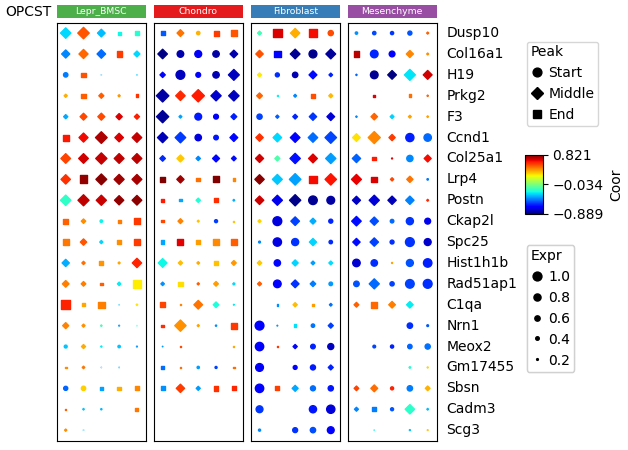

In [156]:
plt.figure(figsize=(5,5))
cm = pch.DotClustermapPlotter(LeprDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,
                              col_split_gap=2, col_split=sampleAnnpo,ratio=40,
                              top_annotation=col_ha,col_split_order=colSplitOrder,col_cluster=True,row_cluster=True,
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/24.1.31_fig5_trajmap_plot/lepr_dotplot.pdf")
plt.show()

## summarise module dot

In [165]:
trav=trajMap["TRAV"]

In [171]:
trav.obs_names

Index(['Bmsc2019_Regev_b3_sep_Chondro',
       'BmscEndosteal_Ono_Fgfr3CE_sep_Chondro',
       'BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro',
       'BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro',
       'BmscEndosteal_Ono_Gas1CE_sep_Chondro',
       'BmscEndosteal_Ono_Prrx1cre18M_sep_Chondro',
       'BmscEndosteal_Ono_Prrx1creP21_sep_Chondro',
       'BmscEndosteal_Ono_Prrx1creP21multiome_sep_Chondro',
       'BmscTime_Zhong_16M_sep_Chondro', 'BmscTime_Zhong_1M_sep_Chondro',
       ...
       'BmscTime_Zhong_1.5M_sep_Fibroblast',
       'BmscTime_Zhong_16M_sep_Fibroblast', 'BmscTime_Zhong_1M_sep_Fibroblast',
       'BmscTime_Zhong_3M_sep_Fibroblast', 'Metaphysis_Yang_3_sep_Fibroblast',
       'Metaphysis_Yang_4_sep_Fibroblast',
       'Metaphysis_Yang_sorted_sep_Fibroblast',
       'PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast',
       'Septoclasts_Kishor_Longbone2_sep_Fibroblast',
       'Septoclasts_Kishor_Pdgfra_sep_Fibroblast'],
      dtype='object', length=121)

In [177]:
travScore=pd.DataFrame(trav.X)
travScore.columns=RAVname
travScore.index=trav.obs_names



In [184]:
selectSampleName=travScore["TRAV143"].sort_values(ascending=False).index[0:5]

In [194]:
CoorSelectLepr=coorDf_scale.loc[geneList,selectSampleName]
PeakSelectLepr=peakDf.loc[geneList,selectSampleName]
ExprSelectLepr=peakDf.loc[geneList,selectSampleName]


In [207]:
sc.tl.rank_genes_groups(trav, 'Lineage')

/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/gilberthan/anaconda3/envs/scarches/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


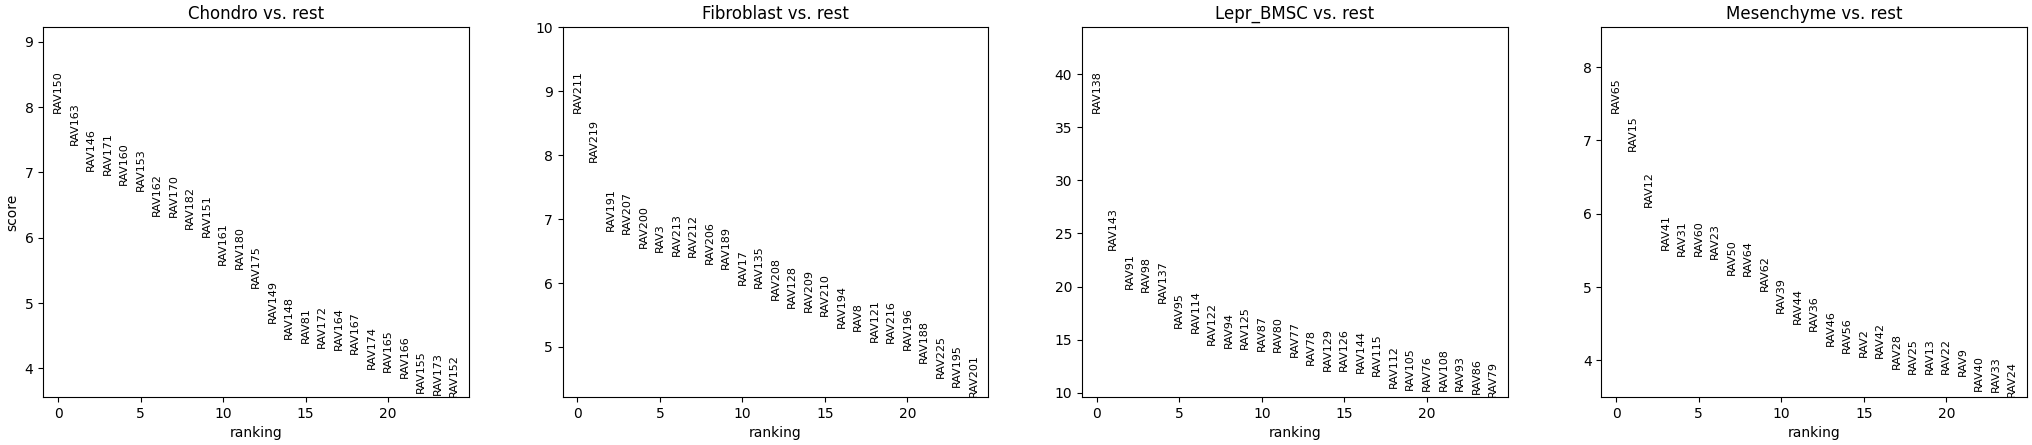

In [208]:
sc.pl.rank_genes_groups(trav, n_genes=25, sharey=False)

In [213]:
leprRAVMat=sc.get.rank_genes_groups_df(trav,group="Lepr_BMSC")[0:10]

In [214]:
leprRAVMat.to_csv("../processed_data/12.12_TRAV/1.31_leprTRAVDeg.csv")

In [223]:
RAVselect="T"+leprRAVMat.names

In [224]:
RAVsample=RAVselect[0]

In [225]:
selectSampleName=travScore[RAVsample].sort_values(ascending=False).index[0:5]

In [254]:
RAVselect

0    TRAV138
1    TRAV143
2     TRAV91
3     TRAV98
4    TRAV137
5     TRAV95
6    TRAV114
7    TRAV122
8     TRAV94
9    TRAV125
Name: names, dtype: object

In [279]:
peakList=[]
coorList=[]
exprList=[]
for i in RAVselect:
    RAVsample=i
    # Extract the column
    geneSelectTop20 = travModel.loc[:, RAVsample]
    geneSelectTop20 = geneSelectTop20.sort_values(ascending=False)
    geneSelectTop20=geneSelectTop20.index[0:20]
    CoorSelectLepr=coorDf_scale.loc[geneSelectTop20,selectSampleName]
    PeakSelectLepr=peakDf.loc[geneSelectTop20,selectSampleName]
    PeakSelectLepr=PeakSelectLepr.applymap(lambda x:'End' if x>=7 else 'Middle' if x >= 3 else 'Start')
    PeakSelectLeprLong=pd.melt(PeakSelectLepr, value_vars=PeakSelectLepr.columns)
    ExprSelectLepr=scaled_df2.loc[geneSelectTop20,selectSampleName]
    peakMean=PeakSelectLeprLong.iloc[:,1].mode()
    coorMean=np.mean(CoorSelectLepr)
    exprMean=np.mean(ExprSelectLepr)
    peakList.append(peakMean)
    coorList.append(coorMean)
    exprList.append(exprMean)

In [281]:
peakList

[0    Start
 Name: value, dtype: object,
 0    Middle
 Name: value, dtype: object,
 0    End
 Name: value, dtype: object,
 0    Start
 Name: value, dtype: object,
 0    Start
 Name: value, dtype: object,
 0    Middle
 Name: value, dtype: object,
 0    End
 Name: value, dtype: object,
 0    Start
 Name: value, dtype: object,
 0    Middle
 Name: value, dtype: object,
 0    End
 Name: value, dtype: object]

In [290]:
coorDfLepr.stack()

       names  
Score  TRAV138   -0.292378
       TRAV143    0.066575
       TRAV91     0.648983
       TRAV98    -0.387805
       TRAV137   -0.181301
       TRAV95     0.130933
       TRAV114    0.294051
       TRAV122   -0.170239
       TRAV94     0.112555
       TRAV125    0.531631
dtype: float64

In [293]:
coorDfLepr=pd.DataFrame(coorList).T
coorDfLepr.columns=RAVselect
coorDfLepr.index=["Score"]
peakDfLepr=pd.DataFrame(peakList).T
peakDfLepr.columns=RAVselect
peakDfLepr.index=["Score"]
exprDfLepr=pd.DataFrame(exprList).T
exprDfLepr.columns=RAVselect
exprDfLepr.index=["Score"]
def makeLongSum():
    coorLong=coorDfLepr.stack().reset_index(name="Coor")
    exprLong=exprDfLepr.stack().reset_index(name="Expr")
    peakLong=peakDfLepr.stack().reset_index(name="Peak")
    combineDf=coorLong
    combineDf["Expr"]=exprLong['Expr']
    combineDf["Peak"]=peakLong['Peak']
    return(combineDf)

In [294]:
leprSumDf=makeLongSum()

In [324]:
leprSumDf["names"]=pd.Categorical(leprSumDf["names"],categories=RAVselect)

In [325]:
leprSumDf["names"]

typing.Literal[<no_default>]
0    TRAV138
1    TRAV143
2     TRAV91
3     TRAV98
4    TRAV137
5     TRAV95
6    TRAV114
7    TRAV122
8     TRAV94
9    TRAV125
Name: names, dtype: category
Categories (10, object): ['TRAV138', 'TRAV143', 'TRAV91', 'TRAV98', ..., 'TRAV114', 'TRAV122', 'TRAV94', 'TRAV125']

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm
Incresing ncol


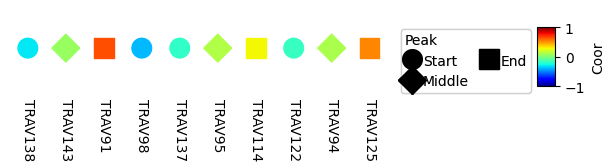

In [330]:
plt.figure(figsize=(5,1))
cm = pch.DotClustermapPlotter(leprSumDf,x='names',y='level_0',value='Coor',c='Coor',hue='Peak',s=1,
                               marker={'Start':'o','Middle':'D','End':'s'},ratio=200,
                              col_cluster=False,row_cluster=False,vmax=1,vmin=-1,
                             show_rownames=False,show_colnames=True)
plt.savefig("../result/24.1.31_fig5_trajmap_plot/leprSumDotplot.pdf")
plt.show()

In [195]:
PeakSelectLepr=peakDf.loc[geneList,selectSampleName]

In [335]:
travScore

,TRAV1,TRAV2,TRAV3,TRAV4,TRAV5,TRAV6,TRAV7,TRAV8,TRAV9,TRAV10,...,TRAV217,TRAV218,TRAV219,TRAV220,TRAV221,TRAV222,TRAV223,TRAV224,TRAV225,TRAV226
Bmsc2019_Regev_b3_sep_Chondro,-2.030610,-1.767343,-1.868706,-1.058582,-1.797991,-1.921934,-1.889285,-1.973597,-1.588144,-1.813772,...,-1.802840,-1.979071,-1.937349,-1.849037,-1.863426,-2.037230,-1.521405,-1.155460,-1.354940,-1.585011
BmscEndosteal_Ono_Fgfr3CE_sep_Chondro,-1.823701,-1.354978,-1.436777,-0.962681,-1.545500,-1.772375,-2.112767,-0.820226,-1.419047,-1.311589,...,-1.917496,-1.771478,-1.850028,-1.422765,-1.846065,-1.546361,-1.269140,-1.199770,-0.940090,-1.811048
BmscEndosteal_Ono_Fgfr3CEp53cHet_sep_Chondro,-1.561985,-1.296873,-1.381521,-0.318902,-1.428406,-1.227802,-1.214212,-0.197400,-1.311922,-1.590174,...,-0.972509,-0.484632,-1.060069,-1.152762,-1.498560,-0.754183,-0.242519,-0.292423,-1.055887,-1.330299
BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Chondro,-1.525229,-1.445885,-1.357668,-0.296989,-1.054678,-0.875963,-1.181961,0.390524,-1.111729,-1.329713,...,-0.858982,-0.541781,-1.272865,-1.117646,-1.662919,-0.309348,0.464465,0.118753,-0.908975,-1.568339
BmscEndosteal_Ono_Gas1CE_sep_Chondro,-0.745045,-1.504838,-1.685803,0.778851,-1.541432,-0.727895,-0.709426,-0.552058,-0.447484,-0.934362,...,-1.055694,-0.581858,-0.381426,-0.473930,-1.625620,-0.649936,0.341511,-0.734500,-1.380183,-1.142061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Metaphysis_Yang_4_sep_Fibroblast,0.764659,0.366933,1.409362,-0.103597,0.541148,0.424840,0.247660,2.841069,-0.134948,0.817809,...,0.944799,1.428436,2.347057,0.124722,0.361319,1.055293,0.454418,0.456465,0.480853,0.197909
Metaphysis_Yang_sorted_sep_Fibroblast,0.544285,0.956788,0.879035,0.584419,1.138355,0.915992,0.569794,1.616029,0.602078,1.023287,...,1.581826,1.054307,0.886103,5.169299,2.816269,2.696608,0.597275,0.791930,0.284294,0.808665
PerichondrialP21_Matsushita_FR3CreCxcl12GfpP21_sep_Fibroblast,-0.433982,-0.237941,0.109321,-0.658246,0.421142,-0.611158,-0.725114,0.778827,-0.750218,-0.095986,...,-0.173344,-0.292696,-0.574685,-0.285121,0.172199,0.170209,7.493893,8.063574,5.670051,6.420573
Septoclasts_Kishor_Longbone2_sep_Fibroblast,-0.033197,-0.310841,0.838894,-0.565566,0.710415,-0.689708,-0.221626,-0.617975,-0.828777,-0.482494,...,0.411557,-0.079148,0.337677,1.146346,-0.128508,0.116937,0.357251,0.180206,1.280528,0.586567


In [336]:
travRaw=pd.DataFrame(trav.layers["raw"])
travRaw.index=travScore.index
travRaw.columns=travScore.columns

In [338]:
travRawBinary=travRaw>0.4

In [340]:
travColSum=travRawBinary.sum(axis=0)

In [344]:
travColSum=travColSum.sort_values(ascending=False)

In [345]:
travColSumDf=pd.DataFrame(travColSum)

In [346]:
travColSumDf.to_csv("../processed_data/12.12_TRAV/conservedtravColSumDf_trav.csv")

In [354]:
travColSumDf[0:20].index

Index(['TRAV208', 'TRAV194', 'TRAV77', 'TRAV79', 'TRAV6', 'TRAV92', 'TRAV125',
       'TRAV132', 'TRAV93', 'TRAV222'],
      dtype='object')

In [367]:
# Extract the column
geneList = travModel.loc[:, "TRAV77"]
geneList = geneList.sort_values(ascending=False)
geneList=geneList.index[0:20]

conservedDf=makeLong(geneList,combined_list)

In [368]:
conservedDf

,level_0,level_1,Coor,Expr,Peak
0,Sox6,Bmsc2019_Regev_samp1_sep_Lepr_BMSC,0.567746,0.109444,End
1,Sox6,BmscTime_Zhong_1.5M_sep_Lepr_BMSC,0.624056,0.170286,End
2,Sox6,BmscTime_Zhong_1M_sep_Lepr_BMSC,0.623563,0.161061,End
3,Sox6,Bmsc2019_Regev_bm2_sep_Lepr_BMSC,0.528886,0.116629,Middle
4,Sox6,BmscEndosteal_Ono_Fgfr3CEp53cKO_sep_Lepr_BMSC,0.566598,0.158451,End
...,...,...,...,...,...
395,Nrp2,Ablation_Matsushita_cxcl2_sep_Fibroblast,0.852138,0.878312,End
396,Nrp2,BmscTime_Zhong_1.5M_sep_Fibroblast,0.884824,0.848808,End
397,Nrp2,Ablation_Matsushita_abl14_sep_Fibroblast,0.852802,0.863686,End
398,Nrp2,BmscEndosteal_Ono_Prrx1cre18M_sep_Fibroblast,0.870350,0.956643,End


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm


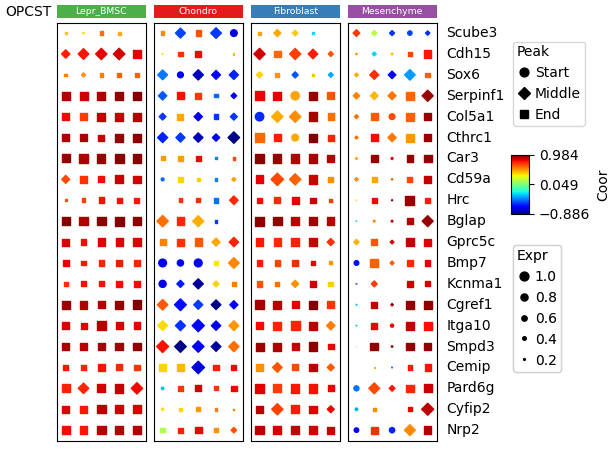

In [369]:
plt.figure(figsize=(5,5))
cm = pch.DotClustermapPlotter(conservedDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,
                              col_split_gap=2, col_split=sampleAnnpo,ratio=40,
                              top_annotation=col_ha,col_split_order=colSplitOrder,col_cluster=True,row_cluster=True,
                              show_rownames=True,show_colnames=False,spines=True)
plt.savefig("../result/24.1.31_fig5_trajmap_plot/conserved_dotplot.pdf")
plt.show()

In [398]:
travColSumDf.iloc[[i-1 for i in [1,3,5,7,8,12,15,16,17,19]] ]

,0
TRAV208,87
TRAV77,83
TRAV6,72
TRAV125,70
TRAV132,61
TRAV140,56
TRAV76,46
TRAV84,46
TRAV116,46
TRAV195,44


In [397]:
[i-1 for i in [1,3,5,7,8,12,15,16,17,19]] 

[0, 2, 4, 6, 7, 11, 14, 15, 16, 18]

In [396]:
for i in [1,3,5,7,8,12,15,16,17,19]
[1,3,5,7,8,12,15,16,17,19]-1

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [399]:
peakList=[]
coorList=[]
exprList=[]
RAVselect=travColSumDf.iloc[[i-1 for i in [1,3,5,7,8,12,15,16,17,19]] ].index
for i in RAVselect:
    RAVsample=i
    # Extract the column
    geneSelectTop20 = travModel.loc[:, RAVsample]
    geneSelectTop20 = geneSelectTop20.sort_values(ascending=False)
    geneSelectTop20=geneSelectTop20.index[0:20]
    CoorSelectLepr=coorDf_scale.loc[geneSelectTop20,selectSampleName]
    PeakSelectLepr=peakDf.loc[geneSelectTop20,selectSampleName]
    PeakSelectLepr=PeakSelectLepr.applymap(lambda x:'End' if x>=7 else 'Middle' if x >= 3 else 'Start')
    PeakSelectLeprLong=pd.melt(PeakSelectLepr, value_vars=PeakSelectLepr.columns)
    ExprSelectLepr=scaled_df2.loc[geneSelectTop20,selectSampleName]
    peakMean=PeakSelectLeprLong.iloc[:,1].mode()
    coorMean=np.mean(CoorSelectLepr)
    exprMean=np.mean(ExprSelectLepr)
    peakList.append(peakMean)
    coorList.append(coorMean)
    exprList.append(exprMean)

coorDfLepr=pd.DataFrame(coorList).T
coorDfLepr.columns=RAVselect
coorDfLepr.index=["Score"]
peakDfLepr=pd.DataFrame(peakList).T
peakDfLepr.columns=RAVselect
peakDfLepr.index=["Score"]
exprDfLepr=pd.DataFrame(exprList).T
exprDfLepr.columns=RAVselect
exprDfLepr.index=["Score"]

conservedSumDf=makeLongSum()

In [392]:
conservedSumDf

,level_0,level_1,Coor,Expr,Peak
0,Score,TRAV194,0.772483,0.487384,End
1,Score,TRAV79,0.804495,0.530709,End
2,Score,TRAV92,0.829967,0.579012,End
3,Score,TRAV132,-0.383368,0.286075,Start
4,Score,TRAV93,0.605130,0.404071,End
5,Score,TRAV127,0.671650,0.426757,End
6,Score,TRAV84,0.536208,0.331519,End
7,Score,TRAV116,0.599486,0.378775,End
8,Score,TRAV139,0.483043,0.317879,End
9,Score,TRAV122,-0.170239,0.248981,Start


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm
Incresing ncol


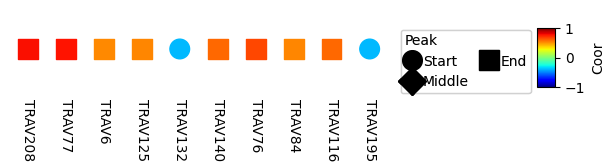

In [400]:
plt.figure(figsize=(5,1))
conservedSumDf["level_1"]=pd.Categorical(conservedSumDf["level_1"],categories=RAVselect)
cm = pch.DotClustermapPlotter(conservedSumDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s=1,
                               marker={'Start':'o','Middle':'D','End':'s'},ratio=200,
                              col_cluster=False,row_cluster=False,vmax=1,vmin=-1,
                             show_rownames=False,show_colnames=True)
plt.savefig("../result/24.1.31_fig5_trajmap_plot/conserveSumDotplot.pdf")
plt.show()

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 12.172222222222222 mm
Incresing ncol


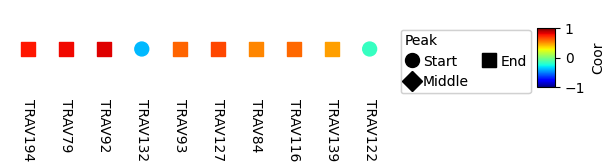

In [394]:
plt.figure(figsize=(5,1))
conservedSumDf["level_1"]=pd.Categorical(conservedSumDf["level_1"],categories=RAVselect)
cm = pch.DotClustermapPlotter(conservedSumDf,x='level_1',y='level_0',value='Coor',c='Coor',hue='Peak',s=1,
                               marker={'Start':'o','Middle':'D','End':'s'},ratio=100,
                              col_cluster=False,row_cluster=False,vmax=1,vmin=-1,
                             show_rownames=False,show_colnames=True)
plt.savefig("../result/24.1.31_fig5_trajmap_plot/conserveSumDotplot2.pdf")
plt.show()

In [191]:
np.mean(leprSelect)

0.03846277495715455

In [41]:
meta=pd.read_csv("../../important_processed_data/10.26_wt_integrate_meta.csv",index_col=0)
sampleDf2=meta[["Sample","Project"]][meta["Sample"].isin(coorDf.columns)].drop_duplicates()
sampleDf2.index=sampleDf2["Sample"]

/tmp/ipykernel_893794/563224984.py:1: DtypeWarning: Columns (12,17,18,19,21,22,23,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  meta=pd.read_csv("../../important_processed_data/10.26_wt_integrate_meta.csv",index_col=0)


In [97]:
selected_samples[]

{'Lepr_BMSC': [46, 20, 17, 47, 58],
 'Chondro': [15, 0, 6, 9, 5],
 'Mesenchyme': [64, 92, 70, 82, 71],
 'Fibroblast': [116, 105, 119, 117, 101]}

In [95]:
for value, indices in selected_samples.items():
    samples = [lineageAnno[index] for index in indices]

In [98]:
combined_list = [value for values in selected_samples.values() for value in values]


In [99]:
combined_list

[46,
 20,
 17,
 47,
 58,
 15,
 0,
 6,
 9,
 5,
 64,
 92,
 70,
 82,
 71,
 116,
 105,
 119,
 117,
 101]

In [381]:
trav.layers["scale"]=trav.X

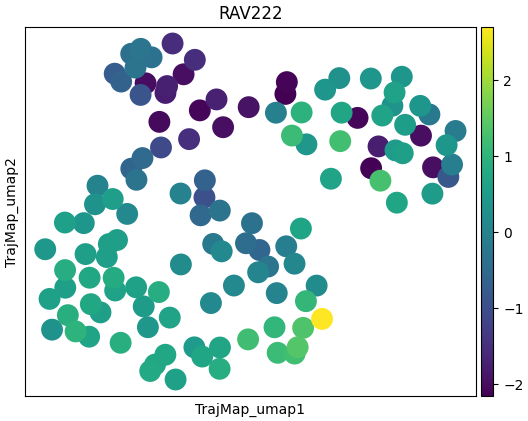

In [379]:
sc.pl.embedding(trav,color="RAV222",basis="TrajMap_umap")

In [377]:
trav

AnnData object with n_obs × n_vars = 121 × 226
    obs: 'Organ', 'Stage', 'Age', 'Tissue', 'Tissue.Specific.', 'Gene.type', 'Treatment', 'Age.In.Detail.', 'Machine', 'Origin', 'Sample', 'Lineage', 'coor:mod_weight', 'expr:mod_weight', 'peak:mod_weight', 'TRAV:mod_weight', 'Age_OPC'
    var: 'mean', 'std'
    uns: 'Age_OPC_colors', 'Age_colors', 'Lineage_colors', 'neighbors', 'pca', 'umap', 'rank_genes_groups'
    obsm: 'TrajMap_umap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'connectivities', 'distances'